<a href="https://colab.research.google.com/github/Lucress/Be-Suspicious-on-Movies-Rating/blob/main/Be_suspicious_online_movie_ratings(Fandango).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRESENTATION**

If you're considering going out to see a movie, how much can you trust online reviews and ratings?

Especially if the company displaying the note also makes money selling movie tickets.

Does the company tend to over-rate movies with better ratings than they should get?

**Objective :**
My goal is to determine if Fandango's ratings in 2015 were geared towards better movie ratings/ratings in an effort to sell more tickets.

The data are coming from this article https://fivethirtyeight.com/features/fandango-movies-ratings/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# **Part 1: Exploring the Scores Displayed by Fandango vs. Real User Ratings**

In [4]:
fandango_data = pd.read_csv('fandango_scrape.csv')
fandango_data.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [7]:
fandango_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [8]:
fandango_data.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Let's explore the relationship between a movie's popularity and its rating.

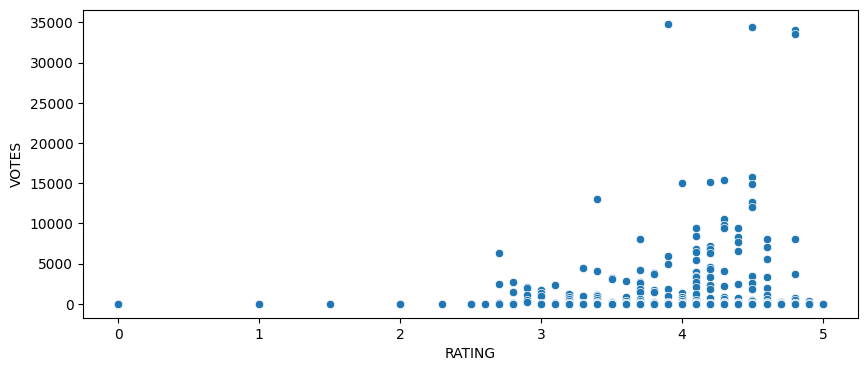

In [15]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=fandango_data, x='RATING', y='VOTES');

In [16]:
fandango_data.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


On this part, we will try to remove more informations from our dataframe about the year.
We will try to see how our dataframe behave according to that parameter.

In [18]:
title = 'name of the movie (YEAR)'
title.split('(')[-1].replace(')','')

'YEAR'

In [20]:
fandango_data['YEAR'] = fandango_data['FILM'].apply(lambda title: title.split('(')[-1].replace(')','') )
fandango_data

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [22]:
fandango_data['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

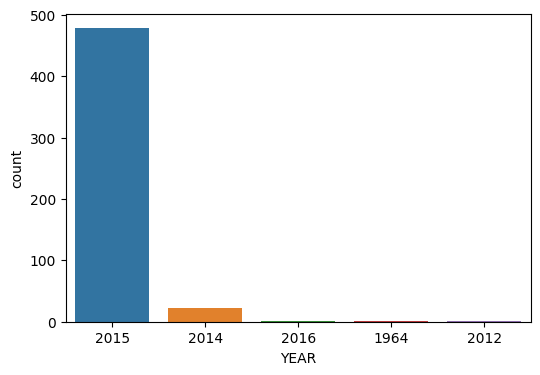

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(data=fandango_data, x='YEAR');

What are the 10 movies with the most votes?

In [44]:
fandango_data.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [45]:
no_votes = fandango_data['VOTES']== 0
no_votes.sum()

69

In order to make our Analysis, we have to keep just useful data and in this case, movie that as votes count oof zero must be remove.

In [47]:
fandango_votedmovies = fandango_data[fandango_data['VOTES']!= 0]
fandango_votedmovies

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


As stated in the article, due to the HTML display and star rating, the actual user rating may be slightly different from the one displayed to a user. Let's visualize this difference with distributions.

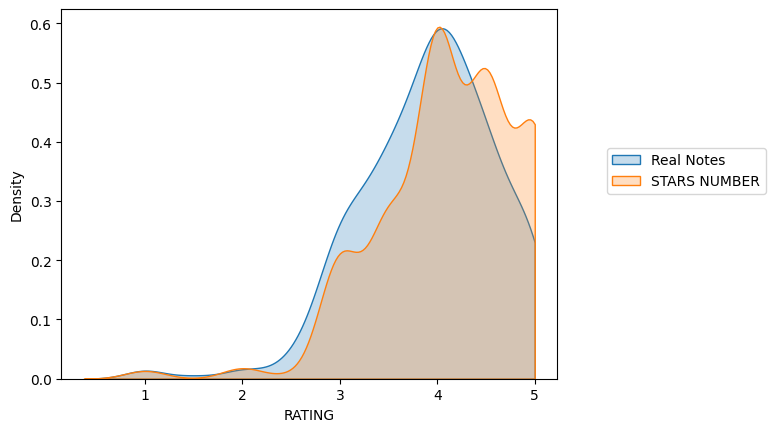

In [60]:
sns.kdeplot(data=fandango_votedmovies, x='RATING', clip=[0,5], fill=True, label='Real Notes')
sns.kdeplot(data=fandango_votedmovies, x='STARS', clip=[0,5], fill=True, label='STARS NUMBER');

plt.legend(loc=(1.1,0.5));



We can see from the density distribution that, there is really a gap between those notes
Let us now quantify this gap by creating a countplot to display the number of times a certain difference occurs.

In [70]:
fandango_votedmovies['STARS_DIFF'] = fandango_votedmovies['STARS']-fandango_votedmovies['RATING']
fandango_votedmovies['STARS_DIFF'] = fandango_votedmovies['STARS_DIFF'].round(2)


<ipython-input-70-cdd67714ea8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_votedmovies['STARS_DIFF'] = fandango_votedmovies['STARS']-fandango_votedmovies['RATING']
<ipython-input-70-cdd67714ea8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_votedmovies['STARS_DIFF'] = fandango_votedmovies['STARS_DIFF'].round(2)


In [71]:
fandango_votedmovies

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


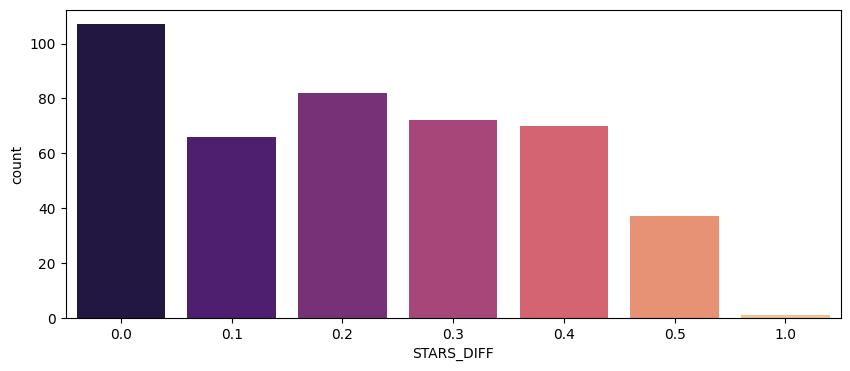

In [74]:
plt.figure(figsize=(10,4), dpi=100)
sns.countplot(data=fandango_votedmovies, x='STARS_DIFF', palette='magma');

We can see from the previous chart that a movie had a one star difference from its actual rating!

In [166]:
fandango_votedmovies[fandango_votedmovies['STARS_DIFF']== 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# **Part 2: Comparison of Fandango ratings with other platforms**


Now let's compare Fandango's scores to other movie rating sites and see how they compare.

In [78]:
all_sites_scores = pd.read_csv('all_sites_scores.csv')
all_sites_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [79]:
all_sites_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [80]:
all_sites_scores.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


# **Rotten Tomatoes**

Let's take a look at Rotten Tomatoes first. RT has two sets of reviews, their reviews (ratings posted by official reviewers) and user reviews.

With the scatter plot, we can easily see that there is a difference between those notes.Let's quantify this difference by comparing ratings from reviewers and RT users.

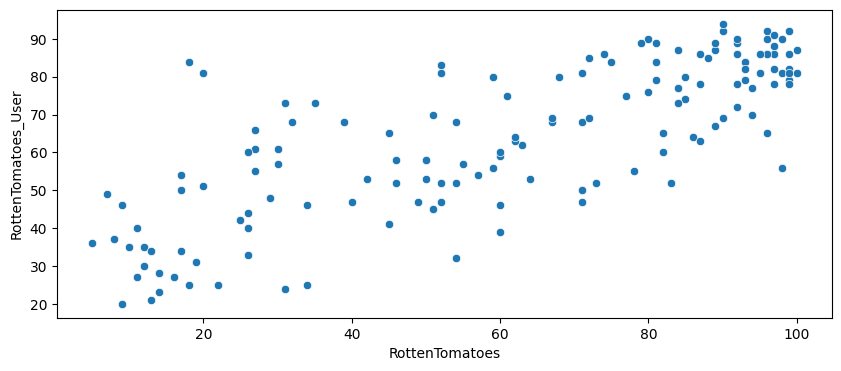

In [84]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites_scores, x='RottenTomatoes', y='RottenTomatoes_User');

In [87]:
all_sites_scores['Rott_Diff']=all_sites_scores['RottenTomatoes'] - all_sites_scores['RottenTomatoes_User']
all_sites_scores

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rott_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [88]:
all_sites_scores['Rott_Diff'].apply(abs).mean()

15.095890410958905

A distribution of differences between the RT reviewer rating and the RT user rating. 

<Figure size 2000x800 with 0 Axes>

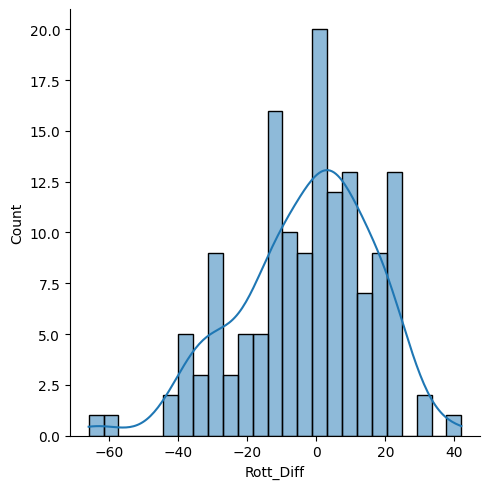

In [104]:
plt.figure(figsize=(10,4), dpi=200)
sns.displot(data=all_sites_scores , x='Rott_Diff', kde=True , bins= 25 );

A distribution showing the absolute value of the difference in ratings between reviewers and users on Rotten Tomatoes

<Figure size 2000x800 with 0 Axes>

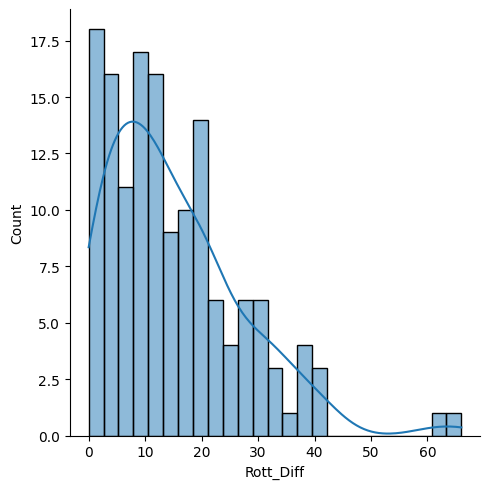

In [107]:
plt.figure(figsize=(10,4), dpi=200)
sns.displot( x=all_sites_scores['Rott_Diff'].apply(abs), kde=True , bins= 25 );

Let's see which movies cause the biggest differences. 

Let's show 
- the top 5 movies with the biggest negative difference between RT users and reviews. Since we calculated the difference as (Critics' Ratings - User Ratings), large negative values ​​imply that users rated the movie much higher on average than critics.

-  the top 5 movies that got an average rating from critics higher than from users.


In [164]:
all_sites_scores.nsmallest(5,'Rott_Diff')[['FILM','Rott_Diff']]

,FILM,Rott_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [165]:
all_sites_scores.nlargest(5,'Rott_Diff')[['FILM','Rott_Diff']]

,FILM,Rott_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


In [118]:
all_sites_scores

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rott_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


# **MetaCritic**

Now let's look at the MetaCritic ratings. MetaCritic also displays an average user rating against their official displayed rating.


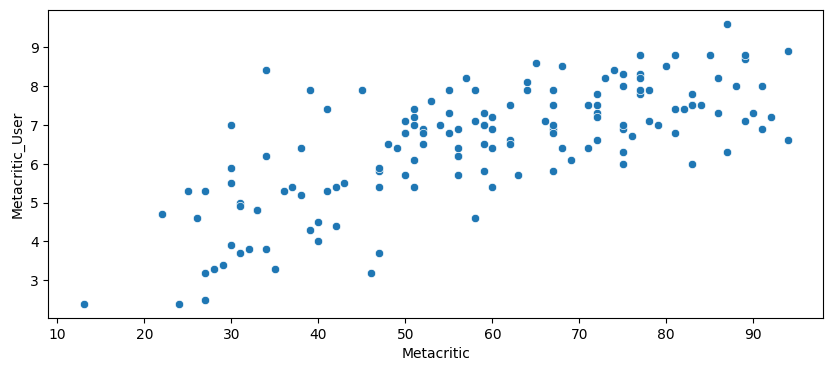

In [119]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites_scores, x='Metacritic', y='Metacritic_User');

# **IMDb**

Finally, let's explore IMDb. since, Metacritic and IMDb offer the number of votes, let's analyze the most popular movies.

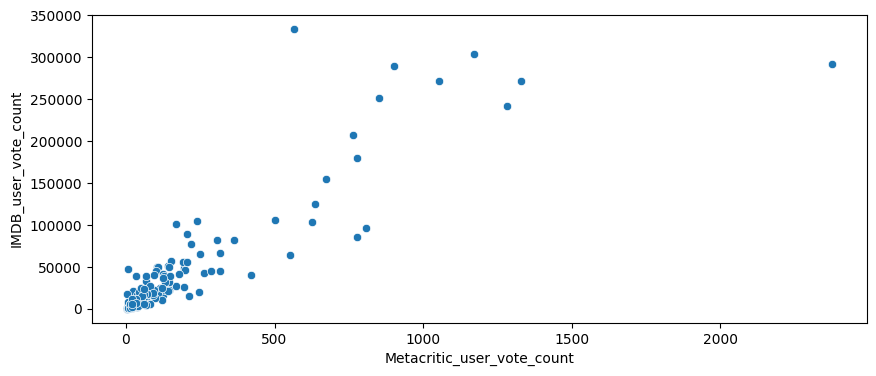

In [121]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites_scores, x='Metacritic_user_vote_count', y='IMDB_user_vote_count');

There are two outliers here. The film with the most votes on IMDb only has about 500 MetaCritic ratings

In [122]:
all_sites_scores.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rott_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


Which film has the most votes from MetaCritic users?

In [123]:
all_sites_scores.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rott_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# **Notes Fandago vs. Autres Plateformes**


Pour finir, commençons à examiner si Fandango affiche artificiellement des notes supérieures aux autres sites de critiques de film pour augmenter les ventes de billets.

We will start by creating a new dataframe which will contain all movies that were rated on all those plateforms.

In [126]:
df = pd.merge(fandango_data, all_sites_scores, on='FILM', how='inner')
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rott_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


Normalization of columns like those in Fandango's STARS and RATINGS on the 0-5 scale

In [128]:
df['RT_norm']=np.round(df['RottenTomatoes']/20,1)
df['RTU_norm']=np.round(df['RottenTomatoes_User']/20,1)

In [129]:
df['Meta_norm']=np.round(df['Metacritic']/20,1)
df['MetaU_norm']=np.round(df['Metacritic_User']/2,1)

In [131]:
df['IMDB_norm']=np.round(df['IMDB']/2,1)

In [133]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rott_Diff,RT_norm,RTU_norm,Meta_norm,MetaU_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [134]:
df.columns


Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rott_Diff',
       'RT_norm', 'RTU_norm', 'Meta_norm', 'MetaU_norm', 'IMDB_norm'],
      dtype='object')

In [137]:
scores_norm = df[['STARS','RATING','RT_norm', 'RTU_norm', 'Meta_norm', 'MetaU_norm', 'IMDB_norm']]
scores_norm.head()

,STARS,RATING,RT_norm,RTU_norm,Meta_norm,MetaU_norm,IMDB_norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


## **Comparison of rating distribution between sites**

Now is the moment of truth! Is Fandango displaying abnormally high ratings? We already know that Fandango displays a STARS rating in the form of stars that is higher than the actual RATING rating, but are the ratings themselves higher than the average of all movie ratings and review platforms?


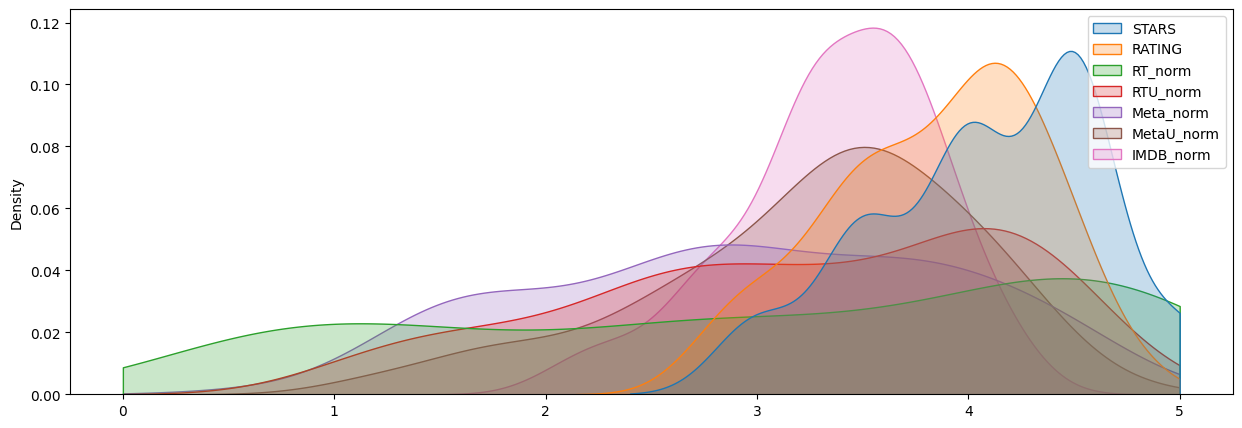

In [152]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=scores_norm , clip=[0,5], fill=True);


It's clear that Fandango's distribution is uneven. We can also see that RT reviews have the most even distribution. Let's directly compare these two.

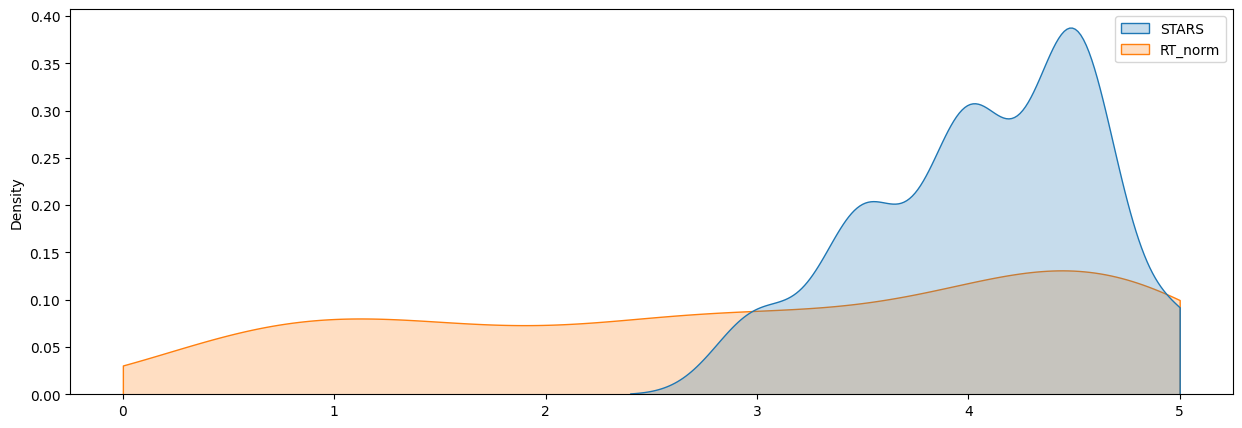

In [153]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=scores_norm[['STARS','RT_norm']] , clip=[0,5], fill=True);

Let's have a look at how are the worst movies rated on all platforms.

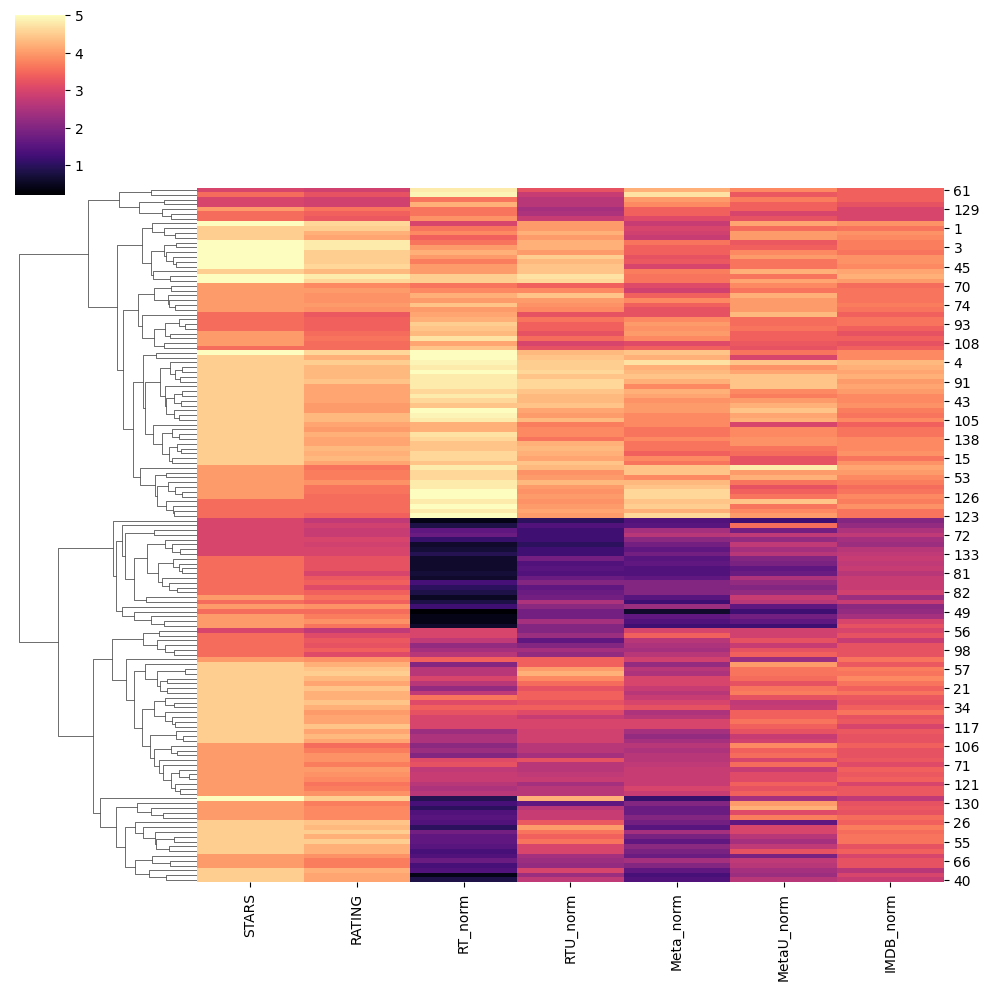

In [155]:
sns.clustermap(scores_norm, cmap='magma', col_cluster=False)

It's clear that Fandango rates movies much more generously than other platforms, especially considering that it displays a rounded version of its rating then. Let's take a look at the top 10 worst movies. Based on Rotten Tomatoes reviewer ratings


Let see the distribution of ratings across all platforms for RT's 10 worst-rated films by critics.

In [160]:
film_norm = df[['FILM','STARS','RATING','RT_norm', 'RTU_norm', 'Meta_norm', 'MetaU_norm', 'IMDB_norm']]
worst_movies=film_norm.nsmallest(10,'RT_norm')
worst_movies

,FILM,STARS,RATING,RT_norm,RTU_norm,Meta_norm,MetaU_norm,IMDB_norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


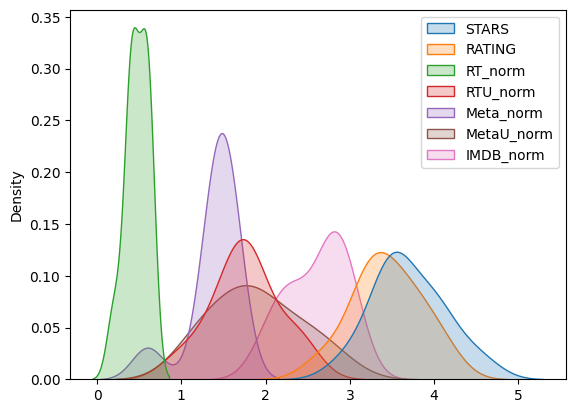

In [163]:
sns.kdeplot(worst_movies,  fill=True);

Final Thoughts: Wow! Fandango rates around 3-4 stars for clearly bad movies!